## Intertemporal Labor Supply and Human Capital Accumulation (IER 2004)
- Paper by Michael Keane and Susumu Imai
- Replication proposal by John Green
- October 2022

### What do the authors do?
1. Estimate a life cycle model of consumption, savings, and labor supply with human capital
    - Accomplish this with a modified Newton search algorithm to simplify the computational burden
    - Calculate the intertemporal elasticity of substitution of labor (IES)
2. Simulate data from the estimated model, which they then use to calculate the IES without human capital
    - Also calculate reduced form estimates using OLS and 2SLS
    
### What does the paper find?
The results suggest that estimates of the IES are very sensitive to the inclusion of human capital. The authors' estimate of 3.82 is significantly larger than the classic results of MaCurdy (1981) and Altonji (1986), whose methods yield estimates of 0.3 to 1.1 on the simulated data. Keane and Imai suggest that their findings may help resolve the seeming contradiction between micro- and macro- estimates of the IES, claiming that the exclusion of human capital formation causes downwards bias in micro-estimates.

The authors find that the opportunity cost of time is relatively flat across the lifecycle, thus explaining relatively inelastic labor supply. This is because although wages grow with age, encouraging labor supply, returns to human capital decrease, which discourags labor supply. The effects roughly balance out, leading to the more-or-less flat path of labor supply that the data shows. Graphically, this is shown in their figure 1, which I replicate here:

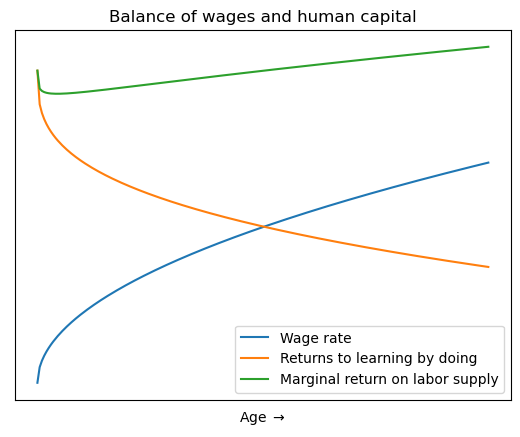

In [61]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Create some dummy data
age = np.arange(0,2,0.01)
# Concave increasing wages
wage_rate = np.power(age,1/2)
# Convex decreasing returns to learning by doing
ret_2_learning = -np.power(age, 1/3) + 2
# Sum of both to get the total marginal return on labor supply
# ie the shadow wage, which is fairly flat
shadow_wage = wage_rate + ret_2_learning

# Create a basic plot to show this
plt.plot(age,wage_rate, label="Wage rate")
plt.plot(age,ret_2_learning, label="Returns to learning by doing")
plt.plot(age,shadow_wage, label="Marginal return on labor supply")
plt.xticks([], [])
plt.yticks([],[])
plt.legend()
plt.xlabel(r'Age $\rightarrow$')
plt.title("Balance of wages and human capital")
plt.show()

### The model
Here I will introduce their life cycle model. Time is discrete, and in every period agents choose their consumption, savings, and labor supply. They retire at period $T$, at which point they do derive positive utility from assets thanks to retirement consumption and a bequest motive.

Agents choose control variables to maximize their discounted expected lifecycle utility:
\begin{equation}
E_t \sum_{\tau=t}^T \beta^{\tau}[u(C_{\tau},\tau)-v(h_{\tau},\epsilon_{2,\tau})]
\end{equation}
subject to the normal intertemporal budget constraint:
\begin{equation}
A_{t+1} = (1+r)A_t + W_{t,s} h_t - C_t
\end{equation}
where $r$ is the risk-free interest rate, $t$ is age and $s$ is calendar period, $W_{t,s}$ is the wage, $h_t$ is hours choice, $C_t$ is consumption choice, and $A_t$ are assets at the beginning of period $t$.

$W_{t,s}$ depends on human capital:
\begin{equation}
W_{t,s} = R_s K_t
\end{equation}
where $R_s$ is the rental rate of human capital at time period $s$ (there is only one type of human capital), and is determined in a competitive market.

Human capital evolves according to age, previous human capital, and previous work hours, and is subject to an idiosyncratic exogenous shock:
\begin{equation}
K_{t+1} = g(K_t, t, h_t)\epsilon_{1,t+1}
\end{equation}
where the form of $g(\cdot, \cdot, \cdot)$ will be suggested by the data.

The agent will maximize their value function, which can be written in the standard Bellman form:
\begin{equation}
V_{t,s}(A_t, K_t, \epsilon_{2,t}) = \text{max}_{c_t,h_t} \{u(c_t,t)-v(h_t,\epsilon_{2,t}) + \beta E_t V_{t+1,s+1}[(1+r)A_t + R_s K_t h_t - c_t, g(h_t, K_t, t)\epsilon_{1,t+1},\epsilon_{2,t+1}]\}
\end{equation}

Keane and Imai assume CRRA utility with age effects for consumption:
\begin{equation}
u(c_t,t) = A(t) \frac{c_t^{\alpha_1}}{\alpha_1}
\end{equation}
where the inclusion of the age effect means that consumption provides less utility at younger ages, and helps explain why we don't observe young people going into debt in order to consume.

Disutility of laobr is given by:
\begin{equation}
v(h_t, \epsilon_{2,t}) = \epsilon_{2,t} b \frac{h_t^{\alpha_2}}{\alpha_2}
\end{equation}
This is a classic setup, echoing MaCurdy (1981) and Altonji (1986).

The human capital production function is derived from the data. The model does allow for heterogeneity by education level.

### Why is it interesting?
Beyond being a classic example of a lifecycle labor supply model, Keane and Imai argue persuasively that human capital must be included in any model that seeks to understand intertemporal consumption and labor supply decisions, and that its exclusion will lead to downard bias in the IES.

### Contribution to HARK
??